In [58]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import nltk 
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

nltk.download('stopwords')
print("Tensorflow Version",tf.__version__)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Tensorflow Version 2.5.0


In [33]:
# df = pd.read_csv('/content/gdrive/MyDrive/data/news_train_from2013.csv 的副本',
#                  encoding = 'latin',header=0)
# df = df.drop(['time', 'sourceTimestamp', 'firstCreated', 'sourceId', 'urgency', 'takeSequence','provider','subjects','audiences','bodySize',
#               "Unnamed: 0","companyCount","headlineTag","marketCommentary","assetCodes","assetName","firstMentionSentence","noveltyCount12H",
#               "noveltyCount24H","noveltyCount3D","noveltyCount5D","noveltyCount7D","volumeCounts12H","volumeCounts24H","volumeCounts3D","volumeCounts5D","volumeCounts7D"], axis=1)
# df.head()
# df.to_csv('/content/gdrive/MyDrive/news_train_from2013.csv')

df = pd.read_csv('/content/gdrive/MyDrive/news_train_from2013.csv',
                 encoding = 'latin',header=0)
df.head()

,Unnamed: 0,headline,sentenceCount,wordCount,relevance,sentimentClass,sentimentNegative,sentimentNeutral,sentimentPositive,sentimentWordCount
0,0,China's Daqing pumps 43.41 mln tonnes of oil i...,11,275,0.235702,-1,0.500739,0.419327,0.079934,73
1,1,"FEATURE-In kidnapping, finesse works best",55,907,0.447214,-1,0.600082,0.345853,0.054064,62
2,2,PRESS DIGEST - Wall Street Journal - Jan 1,15,388,0.377964,-1,0.450049,0.295671,0.254280,67
3,3,PRESS DIGEST - New York Times - Jan 1,14,325,0.149071,-1,0.752917,0.162715,0.084368,83
4,4,PRESS DIGEST - New York Times - Jan 1,14,325,0.149071,-1,0.699274,0.209360,0.091367,102


In [34]:
lab_to_sentiment = {-1:"Negative",0:"Neutral", 1:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentimentClass = df.sentimentClass.apply(lambda x: label_decoder(x))
df = df.drop(['sentenceCount', 'wordCount', 'sentimentNegative', 'sentimentNeutral', 'sentimentPositive', 'sentimentWordCount','relevance'], axis=1)
df.head()

,Unnamed: 0,headline,sentimentClass
0,0,China's Daqing pumps 43.41 mln tonnes of oil i...,Negative
1,1,"FEATURE-In kidnapping, finesse works best",Negative
2,2,PRESS DIGEST - Wall Street Journal - Jan 1,Negative
3,3,PRESS DIGEST - New York Times - Jan 1,Negative
4,4,PRESS DIGEST - New York Times - Jan 1,Negative


Text(0.5, 1.0, 'Sentiment Data Distribution')

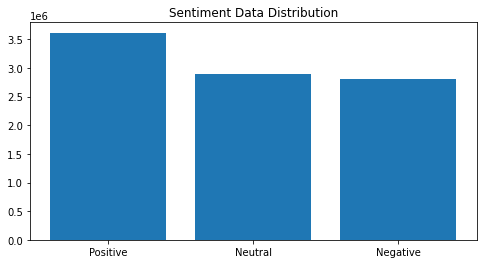

In [ ]:
val_count = df.sentimentClass.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [35]:
def toString(text):
  return str(text)

df.headline = df.headline.apply(lambda x: toString(x))
df.head()

,Unnamed: 0,headline,sentimentClass
0,0,China's Daqing pumps 43.41 mln tonnes of oil i...,Negative
1,1,"FEATURE-In kidnapping, finesse works best",Negative
2,2,PRESS DIGEST - Wall Street Journal - Jan 1,Negative
3,3,PRESS DIGEST - New York Times - Jan 1,Negative
4,4,PRESS DIGEST - New York Times - Jan 1,Negative


## Train and Test Split

In [36]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [37]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=6)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 7463000
Test Data size 1865750


In [38]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.headline)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 307107


In [39]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.headline),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.headline),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (7463000, 30)
Testing X Shape: (1865750, 30)


In [ ]:
labels = train_data.sentimentClass.unique().tolist()

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_data.sentimentClass.to_list())

y_train = encoder.transform(train_data.sentimentClass.to_list())
y_test = encoder.transform(test_data.sentimentClass.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)




y_train shape: (7463000, 3)
y_test shape: (1865750, 3)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-05-29 11:53:15--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-29 11:53:15--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-29 11:53:15--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
!cp 'glove.6B.300d.txt' '/content/gdrive/MyDrive/glove.6B.300d.txt'

In [ ]:
GLOVE_EMB = '/content/gdrive/MyDrive/glove.6B.300d.txt'
# GLOVE_EMB = 'glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = 'best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,            
                      EMBEDDING_DIM,
                      weights=[embedding_matrix],
                      input_length=MAX_SEQUENCE_LENGTH,
                      trainable=False,
                )

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.Model(sequence_input, outputs)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test))

Epoch 1/10
7289/7289 [==============================] - 1910s 257ms/step - loss: 0.6920 - accuracy: 0.6902 - val_loss: 0.6330 - val_accuracy: 0.7187
Epoch 2/10
7289/7289 [==============================] - 1852s 254ms/step - loss: 0.6455 - accuracy: 0.7143 - val_loss: 0.6155 - val_accuracy: 0.7297
Epoch 3/10
7289/7289 [==============================] - 1848s 254ms/step - loss: 0.6334 - accuracy: 0.7205 - val_loss: 0.6067 - val_accuracy: 0.7330
Epoch 4/10
7289/7289 [==============================] - 1850s 254ms/step - loss: 0.6273 - accuracy: 0.7235 - val_loss: 0.6010 - val_accuracy: 0.7369
Epoch 5/10
7289/7289 [==============================] - 1844s 253ms/step - loss: 0.6229 - accuracy: 0.7258 - val_loss: 0.5977 - val_accuracy: 0.7385
Epoch 6/10
7289/7289 [==============================] - 1900s 261ms/step - loss: 0.6202 - accuracy: 0.7271 - val_loss: 0.5934 - val_accuracy: 0.7399
Epoch 7/10
7289/7289 [==============================] - 1884s 259ms/step - loss: 0.6178 - accuracy: 0.7283

In [ ]:
model.save('/content/gdrive/MyDrive/news_train_from2013_model_3.h5')

In [ ]:
model.save_weights('/content/gdrive/MyDrive/news_train_from2013_model_3_weights.h5')

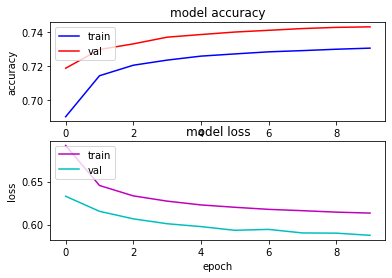

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['train', 'val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
x_test_target = pad_sequences(tokenizer.texts_to_sequences(test_data.headline),
                       maxlen = MAX_SEQUENCE_LENGTH)
print("Target testing X Shape:",x_test_target.shape)


y_pred_1d = model.predict(x_test_target, verbose=1, batch_size=10000)


Target testing X Shape: (1865750, 30)
187/187 [==============================] - 21s 110ms/step


In [ ]:

result = []
for item in y_pred_1d:
  result.append(item.tolist().index(max(item.tolist())))

print(result)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
resultT = []
for item in y_test:
  resultT.append(item.tolist().index(max(item.tolist())))

print(resultT)



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 3
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

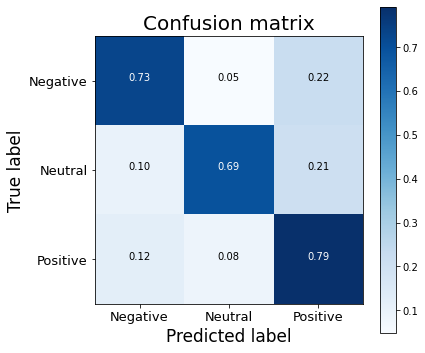

In [ ]:
cnf_matrix = confusion_matrix(resultT, result)
cnf_matrix.shape
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=["Negative","Neutral","Positive"], title="Confusion matrix")
plt.show()

### Classification Scores

In [ ]:
print(classification_report(resultT, result))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73    561910
           1       0.82      0.69      0.75    579743
           2       0.70      0.79      0.74    724097

    accuracy                           0.74   1865750
   macro avg       0.75      0.74      0.74   1865750
weighted avg       0.75      0.74      0.74   1865750



In [ ]:
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)

In [4]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/news_train_from2013_model_3.h5')

In [46]:
import datetime
import calendar

def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year,month)[1])
    return datetime.date(year, month, day)

In [62]:
import datetime

total = []
total_count = 0
for i in range(2000,2021):
  for j in range(1,13):
    path = "/content/gdrive/MyDrive/informationData/" + str(i) + "_" + str(j) + ".csv"
    target = pd.read_csv(path,encoding = 'utf-8')
    target.headline = target.headline.apply(lambda x: toString(x))
    target_test = pad_sequences(tokenizer.texts_to_sequences(target.headline),
                          maxlen = MAX_SEQUENCE_LENGTH)
    y_pred_target = model.predict(target_test, verbose=1, batch_size=10000)

    scores = 0
    for item in y_pred_target:
      total_count = total_count + 1
      result = item.tolist().index(max(item.tolist()))
      if result == 0:
        scores = scores - 1
      elif result == 2:
        scores = scores + 1
      else:
        scores = scores + 0
    
    
    d = datetime.date(i, j, 1)
    d = add_months(d,1)
    temp = []
    temp.append(d)
    temp.append(scores)
    # print(str(d)+'='+str(scores))
    total.append(temp)

print(total_count)
total_path = "/content/gdrive/MyDrive/informationData/total.csv"
header = ['date','scores']
with open(total_path, "w", encoding="utf-8") as f:
  writer = csv.writer(f,delimiter=',')
  writer.writerow(header)
  writer.writerows(total)
  f.close()

1/1 [==============================] - 0s 41ms/step
570354


In [84]:
import pandas as pd
from sklearn import preprocessing
total_path = "/content/gdrive/MyDrive/informationData/total.csv"
target = pd.read_csv(total_path,encoding = 'utf-8')
target = target.drop(['date'], axis=1)
x = target.values
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled,columns=['scores'])
targetSouce = pd.read_csv(total_path,encoding = 'utf-8')
targetSouce = targetSouce.drop(['scores'], axis=1)
test = pd.concat([targetSouce, df], axis=1)
test.head()
test.to_csv("/content/gdrive/MyDrive/informationData/informationTotal.csv",index = False)



In [87]:
target.describe()

,scores
count,252.000000
mean,-821.785714
std,188.131539
min,-1444.000000
25%,-909.250000
50%,-801.500000
75%,-709.500000
max,-304.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1caf071850>]],
      dtype=object)

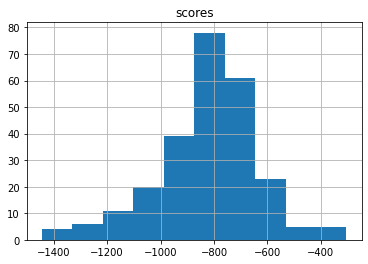

In [89]:
target.hist()
